In [1]:
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True,precision=3)

In [7]:

#N = 300  # Krylov dimension

L=13
M=7
g = 0.0

a = np.loadtxt(f"CSV_Outputs/Lanczos_Coefficients/L{L}M{M}chain/chaos_coefficient{g}/a_ns.csv")
b = np.loadtxt(f"CSV_Outputs/Lanczos_Coefficients/L{L}M{M}chain/chaos_coefficient{g}/b_ns.csv")     # 1 off diagonal terms (b[0] is unused)
#b[0]=0 in convention but thats not necessary for making H
N = len(a)
#making the krylov hamiltonian
Hk = np.zeros((N, N), dtype=complex)
for n in range(N):
    Hk[n, n] = a[n]
    if n + 1 < N:
        Hk[n, n+1] = b[n+1]
        Hk[n+1, n] = b[n+1]

In [8]:
# initial state in krylov basis (v_0)
psi_0 = np.zeros(N, dtype=complex)
psi_0[0] = 1.0

In [9]:
# time evolution, solving schrodigner 
T = 500      # total time
steps = 500
#times = np.linspace(0, T, steps)'
dt = 0.01
ts = np.arange(dt,600,dt)
complexities = []
U = expm(-1j * Hk * dt)
psi_t = [psi_0]
ts = [0]
while ts[-1]<600:
    ts.append(ts[-1]+dt)
    psi_t.append(U.dot(psi_t[-1]))

print(psi_t)

#ck = np.sum(np.arange(N) *psit*np.conjugate(psit))
#complexities.append(ck)

[array([1.+0.j, 0.+0.j, 0.+0.j, ..., 0.+0.j, 0.+0.j, 0.+0.j], shape=(1713,)), array([ 1.-0.012j, -0.-0.005j, -0.+0.j   , ...,  0.+0.j   ,  0.+0.j   ,
        0.+0.j   ], shape=(1713,)), array([ 1.-0.025j, -0.-0.01j , -0.+0.j   , ...,  0.+0.j   ,  0.+0.j   ,
        0.+0.j   ], shape=(1713,)), array([ 0.999-0.037j, -0.   -0.015j, -0.   +0.j   , ...,  0.   +0.j   ,
        0.   +0.j   ,  0.   +0.j   ], shape=(1713,)), array([ 0.999-0.05j, -0.001-0.02j, -0.   +0.j  , ...,  0.   +0.j  ,
        0.   +0.j  ,  0.   +0.j  ], shape=(1713,)), array([ 0.998-0.062j, -0.001-0.025j, -0.   +0.j   , ...,  0.   +0.j   ,
        0.   +0.j   ,  0.   +0.j   ], shape=(1713,)), array([ 0.997-0.075j, -0.002-0.03j , -0.001+0.j   , ...,  0.   +0.j   ,
        0.   +0.j   ,  0.   +0.j   ], shape=(1713,)), array([ 0.996-0.087j, -0.002-0.035j, -0.001+0.j   , ...,  0.   +0.j   ,
        0.   +0.j   ,  0.   +0.j   ], shape=(1713,)), array([ 0.994-0.1j , -0.003-0.04j, -0.001+0.j  , ...,  0.   +0.j  ,
        0.   +

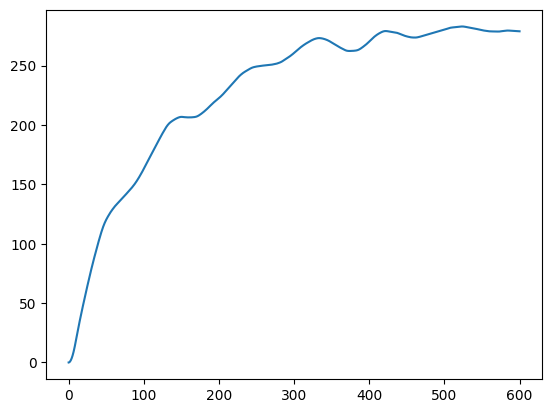

In [10]:
phi_n = np.transpose(np.array(psi_t))
abs_phi_n = phi_n.conj()*phi_n
C_k = sum([n*abs_phi_n[n] for n in range(len(abs_phi_n))])
plt.plot(ts,C_k,label = "Complexity")

In [23]:
print(psi_t[8])

[ 0.969-0.247j -0.007-0.034j -0.001+0.j    ...  0.   +0.j     0.   +0.j
  0.   +0.j   ]


In [ ]:
print(complexities)
print(ck)

NameError: name 'times' is not defined

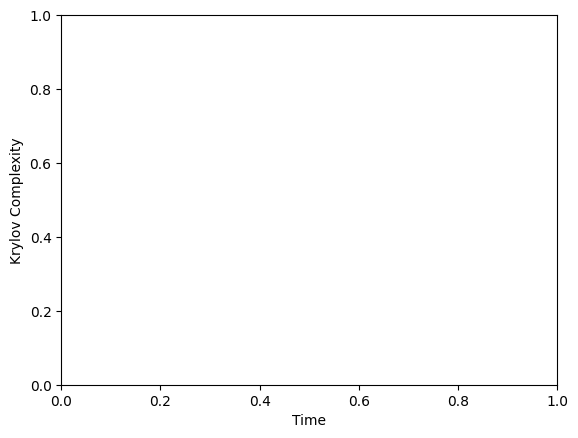

In [ ]:
plt.xlabel("Time")
plt.ylabel("Krylov Complexity")
plt.plot(ts, complexities)